In [1]:
from keras import datasets, layers, models, losses
from tensorflow import keras
import tensorflow as tf
from enum import Enum
import sys
import os
import pathlib
from keras.utils import img_to_array, array_to_img
from tqdm import tqdm

# directory reach
LIBRARY_PATH = "./../"
sys.path.append(LIBRARY_PATH)
from datasets import pet

/home/nicola/miniconda3/envs/nicola/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = tf.keras.models.load_model("../saved_models/unet_pet")
tf.keras.utils.plot_model(model,to_file="model.png" ,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [3]:
train_batches,validation_batches,test_batches = pet.load_train()

2/2 [==============================] - 3s 1s/step


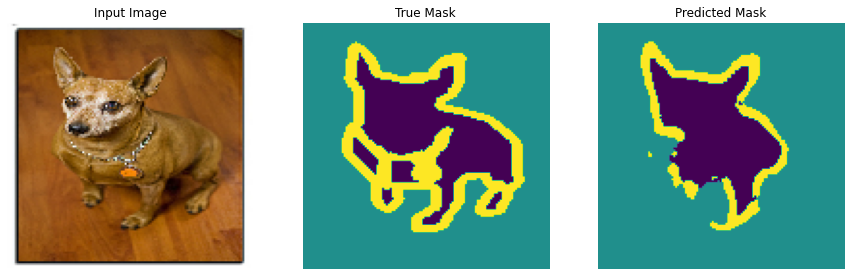

2/2 [==============================] - 3s 1s/step


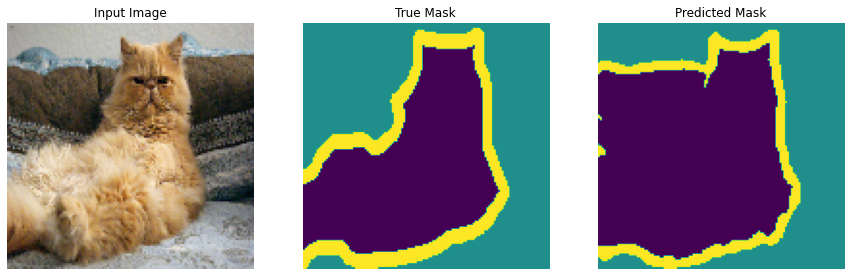

2/2 [==============================] - 3s 1s/step


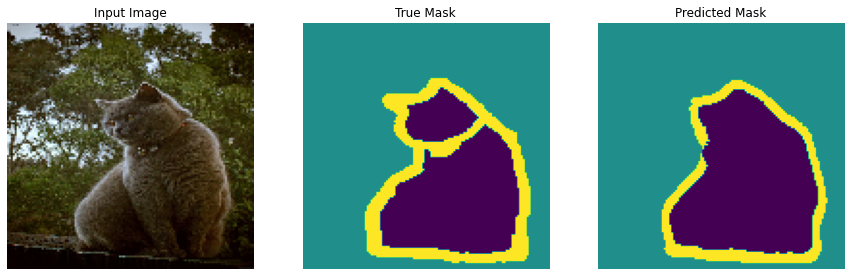

In [4]:
pet.show_predictions(model,test_batches,num=3)